In [ ]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns

import matplotlib.pyplot as plt
from adjustText import adjust_text  # pip install

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
crime_df = pd.read_csv('Violent_Crime_MD_1975_Present.csv')
crime_df

,JURISDICTION,YEAR,POPULATION,MURDER,RAPE,ROBBERY,AGG. ASSAULT,B & E,LARCENY THEFT,M/V THEFT,...,"B & E PER 100,000 PEOPLE","LARCENY THEFT PER 100,000 PEOPLE","M/V THEFT PER 100,000 PEOPLE","MURDER RATE PERCENT CHANGE PER 100,000 PEOPLE","RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE","ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE","AGG. ASSAULT RATE PERCENT CHANGE PER 100,000 PEOPLE","B & E RATE PERCENT CHANGE PER 100,000 PEOPLE","LARCENY THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE","M/V THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE"
0,Allegany County,1975,79655,3,5,20,114,669,1425,93,...,839.9,1789.0,116.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allegany County,1976,83923,2,2,24,59,581,1384,73,...,692.3,1649.1,87.0,-36.7,-62.0,13.9,-50.9,-17.6,-7.8,-25.5
2,Allegany County,1977,82102,3,7,32,85,592,1390,102,...,721.1,1693.0,124.2,53.3,257.8,36.3,47.3,4.2,2.7,42.8
3,Allegany County,1978,79966,1,2,18,81,539,1390,100,...,674.0,1738.2,125.1,-65.8,-70.7,-42.2,-2.2,-6.5,2.7,0.7
4,Allegany County,1979,79721,1,7,18,84,502,1611,99,...,629.7,2020.8,124.2,0.3,251.1,0.3,4.0,-6.6,16.3,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,Worcester County,2016,51255,3,17,39,93,289,1514,32,...,563.8,2953.9,62.4,201.8,14.0,45.3,-8.3,6.5,-2.5,15.0
1100,Worcester County,2017,51408,2,26,43,106,220,1514,39,...,427.9,2945.1,75.9,-33.5,52.5,9.9,13.6,-24.1,-0.3,21.5
1101,Worcester County,2018,51304,0,12,24,88,215,1178,34,...,419.1,2296.1,66.3,-100.0,-53.8,-44.1,-16.8,-2.1,-22.0,-12.6
1102,Worcester County,2019,51606,0,12,24,94,186,1086,30,...,360.4,2104.4,58.1,0.0,-0.6,-0.6,6.2,-14.0,-8.3,-12.3


In [3]:
crime_df.index.stop

1104

In [4]:
print(len(crime_df.columns))
crime_df.columns

38


Index(['JURISDICTION', 'YEAR', 'POPULATION', 'MURDER', 'RAPE', 'ROBBERY',
       'AGG. ASSAULT', 'B & E', 'LARCENY THEFT', 'M/V THEFT', 'GRAND TOTAL',
       'PERCENT CHANGE', 'VIOLENT CRIME TOTAL', 'VIOLENT CRIME PERCENT',
       'VIOLENT CRIME PERCENT CHANGE', 'PROPERTY CRIME TOTALS',
       'PROPERTY CRIME PERCENT', 'PROPERTY CRIME PERCENT CHANGE',
       'OVERALL CRIME RATE PER 100,000 PEOPLE',
       'OVERALL PERCENT CHANGE PER 100,000 PEOPLE',
       'VIOLENT CRIME RATE PER 100,000 PEOPLE',
       'VIOLENT CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE',
       'PROPERTY CRIME RATE PER 100,000 PEOPLE',
       'PROPERTY CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE',
       'MURDER PER 100,000 PEOPLE', 'RAPE PER 100,000 PEOPLE',
       'ROBBERY PER 100,000 PEOPLE', 'AGG. ASSAULT PER 100,000 PEOPLE',
       'B & E PER 100,000 PEOPLE', 'LARCENY THEFT PER 100,000 PEOPLE',
       'M/V THEFT PER 100,000 PEOPLE',
       'MURDER  RATE PERCENT CHANGE PER 100,000 PEOPLE',
       'RAPE RATE PE

In [5]:
crime_df.dtypes

JURISDICTION                                              object
YEAR                                                       int64
POPULATION                                                 int64
MURDER                                                     int64
RAPE                                                       int64
ROBBERY                                                    int64
AGG. ASSAULT                                               int64
B & E                                                      int64
LARCENY THEFT                                              int64
M/V THEFT                                                  int64
GRAND TOTAL                                                int64
PERCENT CHANGE                                           float64
VIOLENT CRIME TOTAL                                        int64
VIOLENT CRIME PERCENT                                    float64
VIOLENT CRIME PERCENT CHANGE                             float64
PROPERTY CRIME TOTALS    

In [6]:
crime_df.columns = crime_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '', regex=False).str.replace(',','')
crime_df['county'] = crime_df['jurisdiction'].str.replace(r'\s+County$', '', regex=True)

# Drop 'jurisdiction' and reorder columns
cols = crime_df.columns.tolist()
cols.remove('jurisdiction')
cols.insert(0, cols.pop(cols.index('county')))
crime_df = crime_df[cols]


crime_df.columns

Index(['county', 'year', 'population', 'murder', 'rape', 'robbery',
       'agg_assault', 'b_&_e', 'larceny_theft', 'm/v_theft', 'grand_total',
       'percent_change', 'violent_crime_total', 'violent_crime_percent',
       'violent_crime_percent_change', 'property_crime_totals',
       'property_crime_percent', 'property_crime_percent_change',
       'overall_crime_rate_per_100000_people',
       'overall_percent_change_per_100000_people',
       'violent_crime_rate_per_100000_people',
       'violent_crime_rate_percent_change_per_100000_people',
       'property_crime_rate_per_100000_people',
       'property_crime_rate_percent_change_per_100000_people',
       'murder_per_100000_people', 'rape_per_100000_people',
       'robbery_per_100000_people', 'agg_assault_per_100000_people',
       'b_&_e_per_100000_people', 'larceny_theft_per_100000_people',
       'm/v_theft_per_100000_people',
       'murder__rate_percent_change_per_100000_people',
       'rape_rate_percent_change_per_10000

In [7]:
crime_df_latest = crime_df[crime_df['year'] == crime_df['year'].max()]

# Drop rows with missing counties or crime rates
crime_df_latest = crime_df_latest.dropna(subset=['county', 'violent_crime_rate_per_100000_people'])

In [8]:
num_counties = crime_df_latest['county'].nunique()
num_features = len(crime_df_latest.columns)
print(f"\nNumber of counties: {num_counties}")
print(f"Number of features: {num_features}")



Number of counties: 24
Number of features: 38


In [20]:
# Group by county and take the mean of all numeric columns
county_crime_df = crime_df_latest.groupby('county', as_index=False).mean(numeric_only=True)


display(county_crime_df.describe())

# Sort and get top/bottom
highest_crime = county_crime_df.sort_values('violent_crime_rate_per_100000_people', ascending=False).head(1)
lowest_crime = county_crime_df.sort_values('violent_crime_rate_per_100000_people').head(1)

# Display only the county and violent crime rate
print("Highest crime county:")
display(highest_crime[['county', 'violent_crime_rate_per_100000_people']])

print("\nLowest crime county:")
display(lowest_crime[['county', 'violent_crime_rate_per_100000_people']])



,year,population,murder,rape,robbery,agg_assault,b_&_e,larceny_theft,m/v_theft,grand_total,...,b_&_e_per_100000_people,larceny_theft_per_100000_people,m/v_theft_per_100000_people,murder__rate_percent_change_per_100000_people,rape_rate_percent_change_per_100000_people,robbery_rate_percent_change_per_100000_people,agg_assault__rate_percent_change_per_100000_people,b_&_e_rate_percent_change_per_100000_people,larceny_theft__rate_percent_change_per_100000_people,m/v_theft__rate_percent_change_per_100000_people
count,24.0,2.400000e+01,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2020.0,2.523251e+05,23.875000,78.666667,301.458333,626.250000,621.166667,3027.583333,444.25000,5123.250000,...,234.383333,1064.029167,106.262500,88.075000,-3.933333,3.750000,14.125000,-18.050000,-18.258333,16.679167
std,0.0,3.067992e+05,68.900882,116.816343,737.699007,1175.148363,1039.826518,4216.656216,873.03221,7763.142793,...,144.839121,442.498005,113.043469,156.795068,38.980237,80.350233,34.234222,16.608327,9.145629,61.754739
min,2020.0,1.927300e+04,0.000000,3.000000,1.000000,17.000000,32.000000,91.000000,3.00000,152.000000,...,91.500000,472.200000,15.600000,-100.000000,-55.400000,-50.200000,-30.000000,-43.100000,-30.400000,-40.300000
25%,2020.0,4.712825e+04,1.000000,12.500000,12.000000,104.750000,94.750000,508.750000,25.75000,768.750000,...,120.525000,738.600000,48.825000,-0.650000,-20.300000,-29.775000,-5.875000,-27.425000,-24.800000,-13.400000
50%,2020.0,1.089135e+05,4.000000,31.500000,40.500000,187.000000,246.000000,1235.500000,89.50000,1885.500000,...,193.500000,976.400000,75.700000,26.300000,-9.800000,-19.850000,5.500000,-19.700000,-20.250000,-4.200000
75%,2020.0,2.785028e+05,10.750000,48.250000,106.250000,372.750000,350.000000,2152.500000,214.75000,3001.500000,...,265.300000,1314.875000,111.200000,172.400000,2.600000,-1.125000,23.475000,-8.650000,-15.350000,20.950000
max,2020.0,1.055918e+06,334.000000,370.000000,3441.000000,5381.000000,4116.000000,12397.000000,3128.00000,28147.000000,...,699.300000,2078.900000,531.400000,593.600000,155.400000,350.000000,103.100000,26.900000,3.200000,225.200000


Highest crime county:


,county,violent_crime_rate_per_100000_people
3,Baltimore City,1610.6



Lowest crime county:


,county,violent_crime_rate_per_100000_people
6,Carroll,111.3


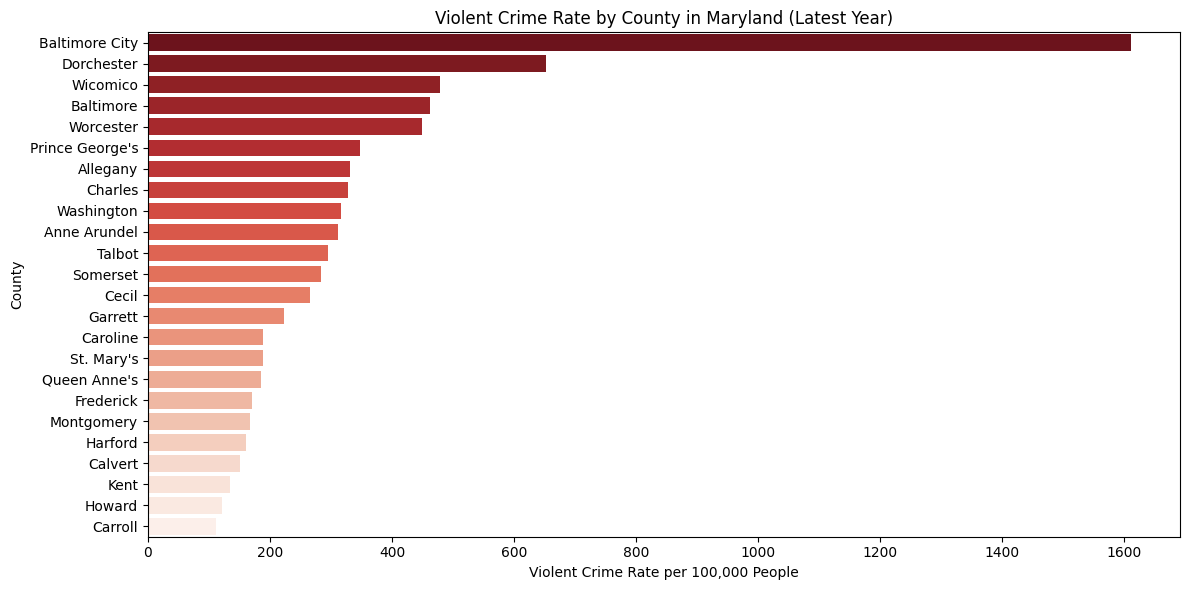

In [22]:
county_crime_df_sorted = county_crime_df.sort_values('violent_crime_rate_per_100000_people', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=county_crime_df_sorted,
    x='violent_crime_rate_per_100000_people',
    y='county',
    hue='county',
    dodge=False,
    legend=False,
    palette='Reds_r'
)

plt.xlabel("Violent Crime Rate per 100,000 People")
plt.ylabel("County")
plt.title("Violent Crime Rate by County in Maryland (Latest Year)")
plt.tight_layout()
plt.show()


In [ ]:
# Select relevant crime rate columns
crime_features = [
    'murder_per_100000_people', 'rape_per_100000_people', 'robbery_per_100000_people',
    'agg_assault_per_100000_people', 'b_&_e_per_100000_people',
    'larceny_theft_per_100000_people', 'm/v_theft_per_100000_people'
]

# Drop any missing values in those columns
crime_data = county_crime_df.dropna(subset=crime_features).copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(crime_data[crime_features])


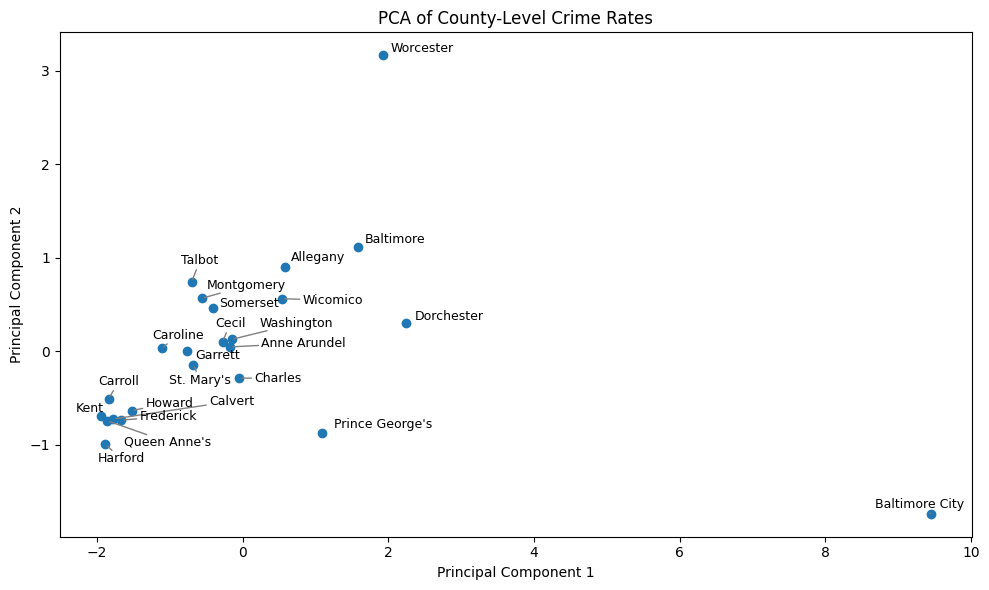

In [ ]:
# Run PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Add PCA result to dataframe
crime_data['PC1'] = pca_components[:, 0]
crime_data['PC2'] = pca_components[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(crime_data['PC1'], crime_data['PC2'])

# Use adjust_text for non-overlapping labels
texts = []
for i, row in crime_data.iterrows():
    texts.append(plt.text(row['PC1'], row['PC2'], row['county'], fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray'))

plt.title("PCA of County-Level Crime Rates")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()


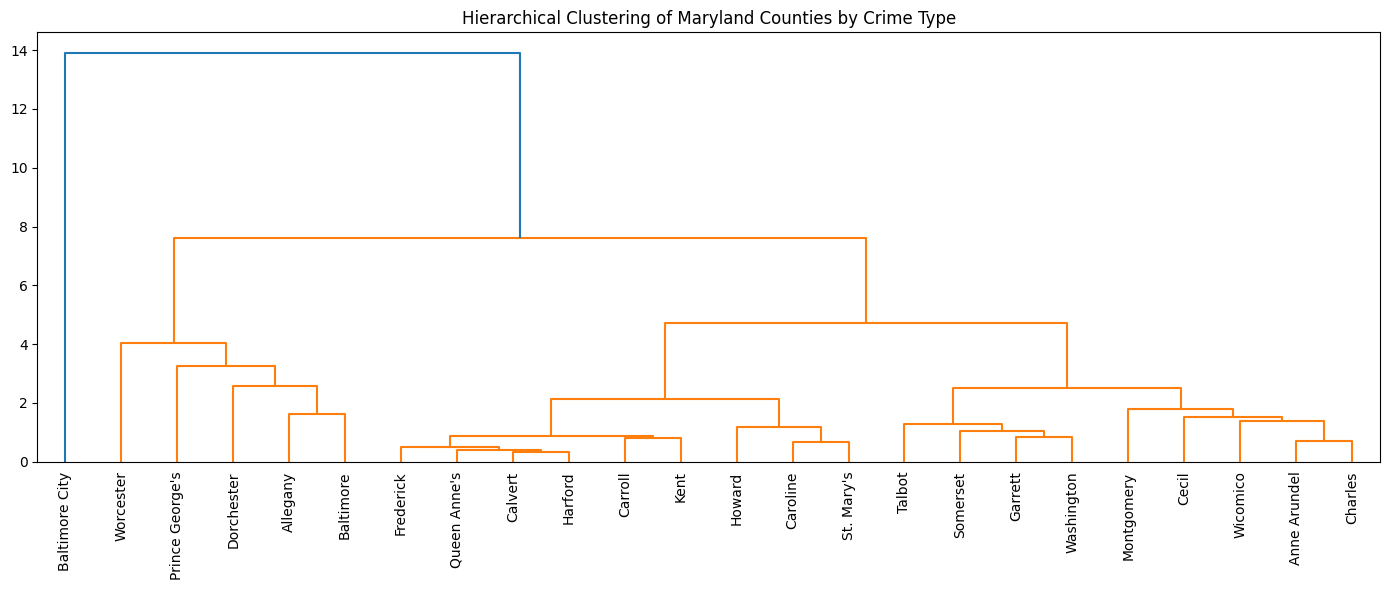

In [ ]:
# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(14, 6))
dendrogram(
    linkage_matrix,
    labels=crime_data['county'].values,
    leaf_rotation=90,
    leaf_font_size=10
)
plt.title("Hierarchical Clustering of Maryland Counties by Crime Type")
plt.tight_layout()
plt.show()
